In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

Now to read in our files and begin data cleaning and preprocessing.

Note we have 7 files from the competetition hosts: 
- Game Data: games.csv, the data for each game (season, date & time, location, home and visitor teams), key variable is `gameID`.
- PFF Scouting Data: PFFScoutingData.csv, "play-level scouting information for each game", key variables are `gameID` and `playID` (note `nflID` not included).
- Player Data: players.csv, information for each player (height, weight, birth, college, position, name), key variable is `nflID` (Does not include `gameID` and `playID`).
- Play Data: plays.csv, "play-level information from each game", key variables are `gameID` and `playID`.
- Tracking Data: tracking2018.csv, tracking 2019.csv, and tracking2020.csv. Each contains "player tracking data" from the indicated season, key variables are `gameID`, `nflID`, and `playID`.

In [5]:
games = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/games.csv")

scout = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/PFFScoutingData.csv")

players = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/players.csv")

play = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/plays.csv")

track18 = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/tracking2018.csv")
track19 = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/tracking2019.csv")
track20 = pd.read_csv("/Users/elizabethgrace/Documents/coding/fall-2021 copia/NFL_Big_Data_Bowl_2022/nfl-big-data-bowl-2022/tracking2020.csv")

In [6]:
players

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


We need to standardize the height of all players. Inches will be easier to code with, so we first define a function `ft_in` to convert all heights from ft-in to inches. It also takes inches to an `int`. 

In [13]:
def ft_in(x):
    if '-' in x:
        meas=x.split('-')
        #this will be a list ['ft','in']
        inches = int(meas[0])*12 + int(meas[1])
        return inches
    else:
        return int(x)

In [16]:
#test function
print(ft_in('6-0'))
print(ft_in('72'))
print(ft_in('5-10'))

72
72
70


Now that we have checked that the function works as planned, we apply it to the `height` column of our dataframe.

In [17]:
players['height'] = players['height'].apply(ft_in)

In [18]:
players['height']

0       73
1       72
2       72
3       73
4       73
        ..
2727    75
2728    75
2729    69
2730    73
2731    70
Name: height, Length: 2732, dtype: int64

In [19]:
players.isnull().sum()

nflId           0
height          0
weight          0
birthDate      17
collegeName     8
Position        0
displayName     0
dtype: int64

`birthDate` and `collegeName` have nulls, but we're not likely using those datapoints, so we will just note that for now.

Now, we turn to the tracking data. We must reorient this to reflect movement in the offense direction instead of the on-field coordinates (reorient the orgin from the bottom left to top right for a change in direction).

[image goes here]

Let's make a practice dataFrame to figure this out.

In [94]:
df = pd.DataFrame({'x': [10,20,40,80], 'y': [10,20,40,80], 'playDirection': ["right", "left","right", "left"]})
df

,x,y,playDirection
0,10,10,right
1,20,20,left
2,40,40,right
3,80,80,left


In [95]:
df.loc[df['playDirection']=='left','x'] = 120 - df.loc[df['playDirection']=='left','x']
df

,x,y,playDirection
0,10,10,right
1,100,20,left
2,40,40,right
3,40,80,left


In [96]:
df.loc[df['playDirection'] == 'left', 'y'] = 160/3 - df.loc[df['playDirection']=='left','y']
df

,x,y,playDirection
0,10,10.000000,right
1,100,33.333333,left
2,40,40.000000,right
3,40,-26.666667,left


Now we want to apply this to each of the actual dataFrames.

In [97]:
#2018 tracking data
track18.loc[track18['playDirection'] == 'left', 'x'] = 120 -track18.loc[track18['playDirection']=='left','x']
track18.loc[track18['playDirection'] == 'left', 'y'] = 160/3 -track18.loc[track18['playDirection']=='left','y']
#note that we have 160/3 for the y direction since the football field is 160ft, but our units are yards

#2019 tracking data
track19.loc[track19['playDirection'] == 'left', 'x'] = 120 -track19.loc[track19['playDirection']=='left','x']
track19.loc[track19['playDirection'] == 'left', 'y'] = 160/3 -track19.loc[track19['playDirection']=='left','y']

#2020 tracking data
track20.loc[track20['playDirection'] == 'left', 'x'] = 120 -track20.loc[track20['playDirection']=='left','x']
track20.loc[track20['playDirection'] == 'left', 'y'] = 160/3 -track20.loc[track20['playDirection']=='left','y']

print("2018:", track18)
print("2019:", track19)
print("2020:", track20)

2018:                              time       x      y     s     a   dis       o  \
0         2018-12-30T21:25:32.200   41.32  29.45  4.36  1.33  0.43  130.42   
1         2018-12-30T21:25:32.300   41.68  29.17  4.59  1.24  0.45  128.59   
2         2018-12-30T21:25:32.400   42.05  28.88  4.74  0.99  0.47  124.47   
3         2018-12-30T21:25:32.500   42.43  28.59  4.87  0.71  0.48  126.02   
4         2018-12-30T21:25:32.600   42.84  28.31  4.96  0.79  0.50  131.71   
...                           ...     ...    ...   ...   ...   ...     ...   
12777346  2018-09-11T05:25:17.800  123.18  51.73  3.76  1.45  0.29     NaN   
12777347  2018-09-11T05:25:17.900  123.40  51.89  3.19  3.02  0.28     NaN   
12777348  2018-09-11T05:25:18.000  123.55  52.18  2.95  3.88  0.32     NaN   
12777349  2018-09-11T05:25:18.100  123.67  52.50  3.01  4.53  0.34     NaN   
12777350  2018-09-11T05:25:18.200  123.74  52.81  3.03  3.97  0.32     NaN   

             dir event    nflId    displayName  jerseyNum

We can also divide up our play data into multiple dataframes based on `specialTeamsPlayType`.

In [104]:
play

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,...,NaN,NaN,NaN,16,19,NaN,75.0,NaN,40,75
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,...,NaN,NaN,NaN,16,25,NaN,NaN,NaN,0,25
19976,2021010315,3886,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,...,NaN,NaN,NaN,16,26,NaN,75.0,NaN,40,75
19977,2021010315,4166,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,0,0,SF,Extra Point,Kick Attempt Good,47590.0,...,NaN,NaN,NaN,22,26,NaN,NaN,NaN,0,95


In [105]:
#kickoffs
play_kickoff = play.loc[play['specialTeamsPlayType']=='Kickoff']

#punts
play_punt=play.loc[play['specialTeamsPlayType']=='Punt']

#fieldGoals
play_fieldgoal=play.loc[play['specialTeamsPlayType']=='Field Goal']

#extraPoint
play_extrapoint = play.loc[play['specialTeamsPlayType']=='Extra Point']

In [100]:
play.value_counts('specialTeamsResult')

specialTeamsResult
Kick Attempt Good           5470
Return                      5207
Touchback                   5156
Fair Catch                  1645
Downed                       834
Out of Bounds                651
Kick Attempt No Good         585
Muffed                       214
Non-Special Teams Result     101
Blocked Kick Attempt          61
Blocked Punt                  39
Kickoff Team Recovery         16
dtype: int64

In [101]:
play_kickoff.value_counts('specialTeamsResult')

specialTeamsResult
Touchback                4773
Return                   2921
Out of Bounds              64
Muffed                     60
Kickoff Team Recovery      16
Fair Catch                  5
Downed                      4
dtype: int64

In [106]:
print("Punt:", play_punt.value_counts('specialTeamsResult'))
print()
print("Field Goal:", play_fieldgoal.value_counts('specialTeamsResult'))
print()
print("Extra Point:", play_extrapoint.value_counts('specialTeamsResult'))


Punt: specialTeamsResult
Return                      2286
Fair Catch                  1640
Downed                       829
Out of Bounds                586
Touchback                    383
Muffed                       154
Non-Special Teams Result      74
Blocked Punt                  39
dtype: int64

Field Goal: specialTeamsResult
Kick Attempt Good           2218
Kick Attempt No Good         386
Blocked Kick Attempt          37
Non-Special Teams Result      14
Downed                         1
Out of Bounds                  1
dtype: int64

Extra Point: specialTeamsResult
Kick Attempt Good           3252
Kick Attempt No Good         199
Blocked Kick Attempt          24
Non-Special Teams Result      13
dtype: int64


In [107]:
kick_scout=play_kickoff.merge(scout, on = ['gameId','playId'])

In [108]:
kick_scout

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
2,2018090600,1387,J.Elliott kicks 65 yards from PHI 35 to end zo...,2,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
3,2018090600,1606,M.Bosher kicks 68 yards from ATL 35 to PHI -3....,2,0,0,ATL,Kickoff,Return,37267.0,...,R,NaN,NaN,ATL 36,8-0-2,NaN,NaN,ATL 14; ATL 17,NaN,NaN
4,2018090600,2225,M.Bosher kicks 65 yards from ATL 35 to end zon...,3,0,0,ATL,Kickoff,Touchback,37267.0,...,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7838,2021010315,2847,M.Wishnowsky kicks 65 yards from SF 35 to end ...,4,0,0,SF,Kickoff,Touchback,47893.0,...,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,SF 20; SF 41,NaN,NaN
7839,2021010315,3105,J.Myers kicks 63 yards from SEA 35 to SF 2. A....,4,0,0,SEA,Kickoff,Return,41175.0,...,R,NaN,NaN,SEA 44,8-0-2,NaN,NaN,SEA 21; SEA 28,NaN,NaN
7840,2021010315,3683,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,...,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,SEA 28; SEA 99,NaN,NaN
7841,2021010315,3886,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,...,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,SEA 28; SEA 99,NaN,NaN


In [113]:
punt_scout=play_punt.merge(scout, on = ['gameId','playId'])

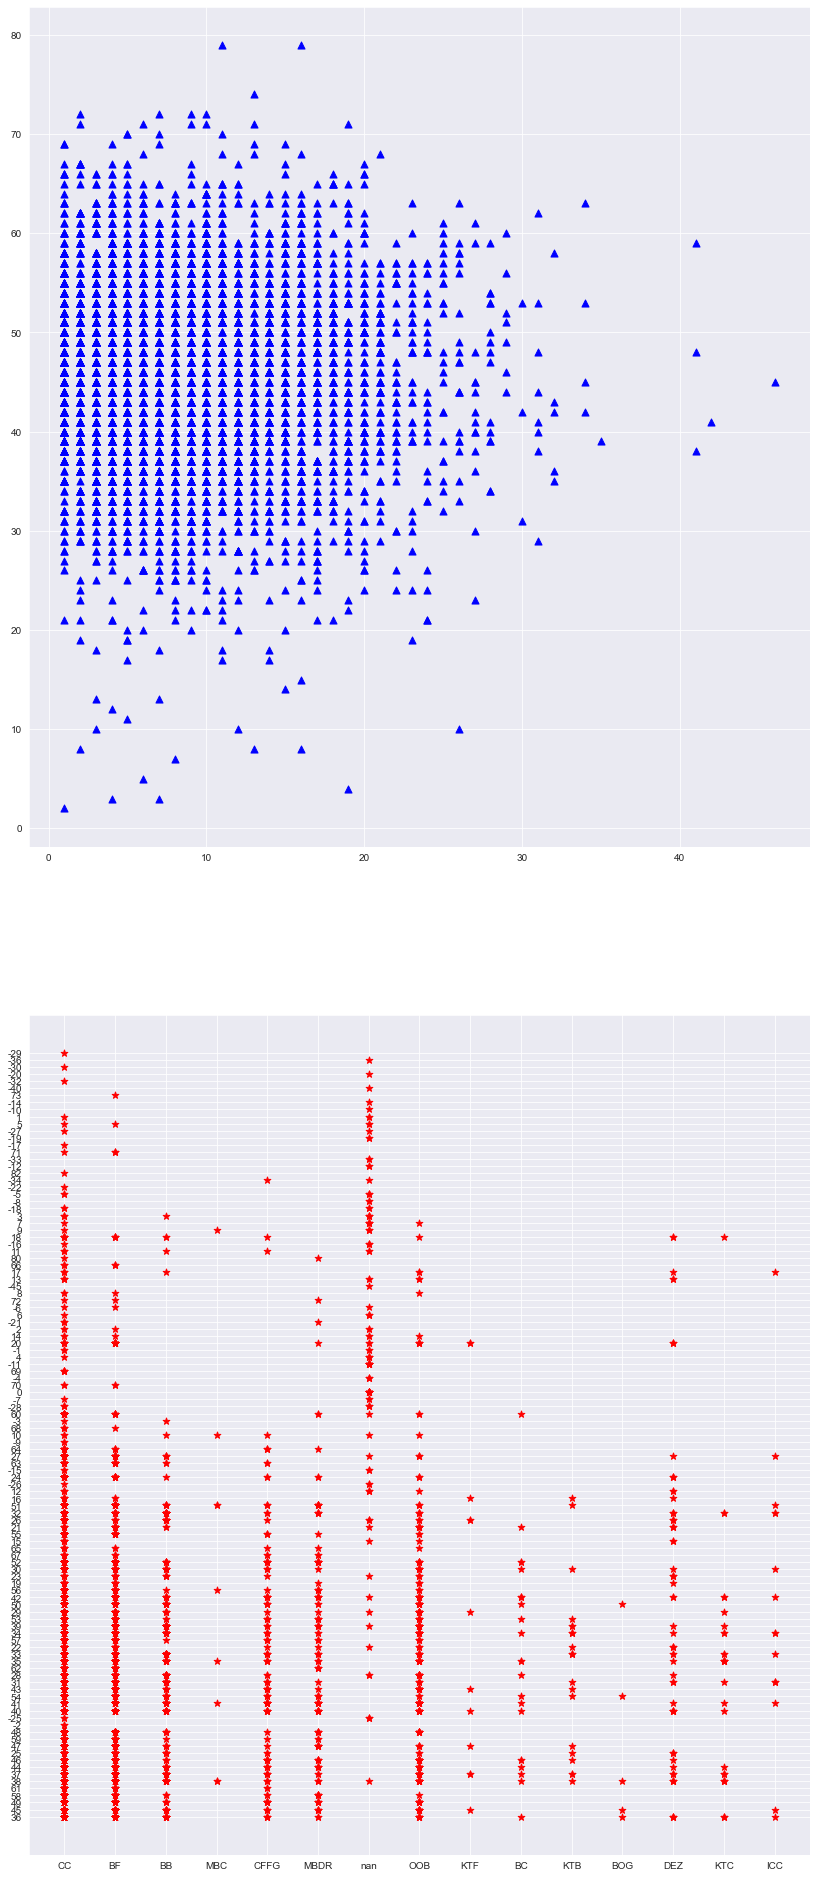

In [122]:
fig, axes = plt.subplots(2,1, figsize=(14,34))

axes[0].scatter(play_punt.yardsToGo, play_punt.kickLength, c="blue", s = 50, marker ="^")

axes[1].scatter(punt_scout.kickContactType.astype(str), punt_scout['playResult'].astype(str), c = "red", s = 50, marker="*")

plt.show()